In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
data.shape

(2000, 21)

In [5]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

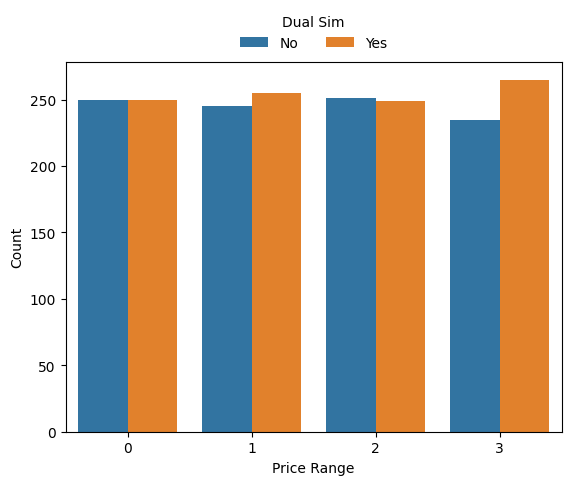

In [6]:
ax = sns.countplot(data, x='price_range', hue='dual_sim')
ax.legend(labels = ['No', 'Yes'])
plt.xlabel('Price Range')
plt.ylabel('Count')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol = 2, title='Dual Sim', frameon=False)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


2024-07-23 14:24:16.420197: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
X = data.drop('price_range', axis=1).values
y = data['price_range'].values


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [11]:
num_classes = 4
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

In [12]:
model = Sequential()
model.add(Dense(20, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Model compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model training
history = model.fit(X_train_scaled, y_train_categorical, epochs=300, validation_data=(X_test_scaled, y_test_categorical))

/opt/anaconda3/envs/DataScience/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.2622 - loss: 1.4420 - val_accuracy: 0.3340 - val_loss: 1.3263
Epoch 2/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3150 - loss: 1.3402 - val_accuracy: 0.3760 - val_loss: 1.2811
Epoch 3/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3702 - loss: 1.2879 - val_accuracy: 0.4440 - val_loss: 1.2223
Epoch 4/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4527 - loss: 1.2083 - val_accuracy: 0.5200 - val_loss: 1.1472
Epoch 5/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5170 - loss: 1.1349 - val_accuracy: 0.6060 - val_loss: 1.0591
Epoch 6/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5824 - loss: 1.0431 - val_accuracy: 0.6380 - val_loss: 0.9509
Epoch 7/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6310 - loss: 0.9453 - val_accuracy: 0.6880 - val_loss: 0.8595
Epoch 8/300
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6837 - loss: 0.8517 - val_accuracy: 0.7440 - 

<Axes: >

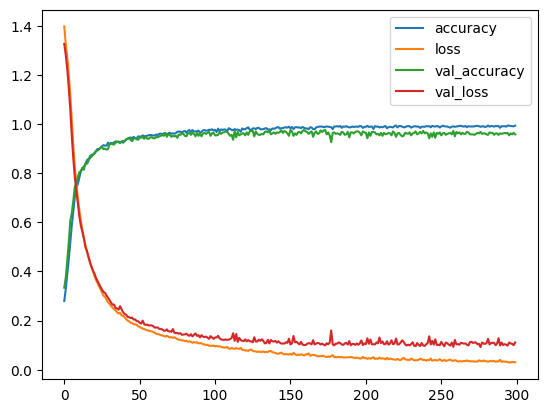

In [13]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [14]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [15]:
y_test_labels = np.argmax(y_test_categorical, axis=1)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, log_loss

target_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']
report = classification_report(y_test_labels, y_pred, target_names=target_names)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test_labels, y_pred)
print("Confusion Matrix:\n", conf_matrix)

roc_auc = roc_auc_score(y_test_categorical, y_pred_prob, multi_class='ovo')
print("ROC-AUC Score:", roc_auc)

log_loss_value = log_loss(y_test_categorical, y_pred_prob)
print("Log Loss:", log_loss_value)

Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      0.95      0.97       132
     Class 1       0.90      0.99      0.94       118
     Class 2       0.97      0.91      0.94       120
     Class 3       0.96      0.98      0.97       130

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500

Confusion Matrix:
 [[125   7   0   0]
 [  0 117   1   0]
 [  0   6 109   5]
 [  0   0   2 128]]
ROC-AUC Score: 0.9980293950936023
Log Loss: 0.1112496216045766
